In [ ]:
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import eigsh, norm
import numpy as np
import matplotlib.pyplot as plt
import itertools
import operator as op
from functools import reduce
import time

In [ ]:
def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom  # or / in Python 2

In [ ]:
def binary_to_comb(num):
  a=[]
  for i in range(len(num)):
    if num[i]=='1': a.append(i)
  
  print(a)
  comb=0
  for i in range(len(a)):
    comb+=ncr(a[i],i)
  return comb

In [ ]:
def choose2num(thelist):
    n = len(thelist)
    k = sum([int(i) for i in thelist]) # total number of 1's
    if ((n==0) or (k==0) or (n==k)): 
        return 0 # base cases of form [], [0,0,...] or [1,1,...]
    num = 0
    for firstbit in range(n-k+1):
        if (thelist[firstbit] == '1'):
            return num + choose2num(thelist[firstbit+1:])
        num += ncr(n-firstbit-1,k-1)

def num2choose(num,n,k):
    if (n < k) or (k < 0): raise ValueError("num2choose: " + str(n) + ", " + str(k))
    if (n==k): return '1'*n  # base case of form [1,1,...]
    if (k==0): return '0'*n  # base case of form [0,0,...]
    num %= ncr(n,k)
    thedigit = 0
    sum = 0
    for thedigit in range(n-k+1):
        oldsum = sum
        sum += ncr(n-1-thedigit,k-1)
        if (num < sum):
            return '0'*thedigit + '1' + num2choose(num-oldsum, n-(thedigit+1),k-1)

In [ ]:
num2choose(95,10,3), choose2num(['0', '0', '0', '1', '0', '0', '1', '0', '1', '0'])

('0001001010', 95)

In [ ]:
def Small_Hamiltonian(H,U,n,m):
  for i in range(ncr(2*n*n, m)):
    key=num2choose(i,2*n*n,m)
    key=(2*n*n-len(key))*'0' + key #Appending additional zeros in the beginning
    #print(i,key)
    key=[x for x in key]

    #Calculate Self-interaction energies
    for j in range(0,2*n*n,2):
      if key[j]=='1' and key[j+1]=='1':
        H[i,i]+=U
    
    #Calculate Hopping energies
    for j in range(n):
      for k in range(2*n):
        if key[j*2*n+k]=='1':
          #Hopp right
          new_key=key.copy()
          new_key[j*2*n+k]='0'
          if k+2<2*n and key[j*2*n+k+2]=='0':
            new_key[j*2*n+k+2]='1'
            str1=""
            new_key=str1.join(new_key)
            H[i,choose2num(new_key)]=t

          #Hopp left
          new_key=key.copy()
          new_key[j*2*n+k]='0'
          if k-2>=0 and key[j*2*n+k-2]=='0':
            new_key[j*2*n+k-2]='1'
            str1=""
            new_key=str1.join(new_key)
            H[i,choose2num(new_key)]=t

          #Hopp bottom
          new_key=key.copy()
          new_key[j*2*n+k]='0'
          if j+1<n and key[(j+1)*2*n+k]=='0':
            new_key[(j+1)*2*n+k]='1'
            str1=""
            new_key=str1.join(new_key)
            H[i,choose2num(new_key)]=t

          #Hopp top
          new_key=key.copy()
          new_key[j*2*n+k]='0'
          if j>0 and key[(j-1)*2*n+k]=='0':
            new_key[(j-1)*2*n+k]='1'
            str1=""
            new_key=str1.join(new_key)
            H[i,choose2num(new_key)]=t
            '''print("top", i,j,k)
            graphic(str1.join(key))
            graphic(new_key)'''

  return H

In [ ]:
def graphic(key):
  n=int(np.sqrt(len(key)/2))
  for i in range(n):
    print(key[i*2*n:(i+1)*2*n])

In [ ]:
def Hamiltonian(H,U,n,m):
  for i in range(4**(n**2)):
    key=bin(i)[2:]
    key=(2*n*n-len(key))*'0' + key #Appending additional zeros in the beginning

    key=[x for x in key]

    #Calculate Self-interaction energies
    for j in range(0,2*n*n,2):
      if key[j]=='1' and key[j+1]=='1':
        H[i,i]+=U
    
    #Calculate Hopping energies
    for j in range(n):
      for k in range(2*n):
        if key[j*2*n+k]=='1':
          #Hopp right
          new_key=key.copy()
          new_key[j*2*n+k]='0'
          if key[j*2*n+(k+2)%(2*n)]=='0':
            new_key[j*2*n+(k+2)%(2*n)]='1'
            str1=""
            new_key=str1.join(new_key)
            H[i,int(new_key,2)]=t

          #Hopp left
          new_key=key.copy()
          new_key[j*2*n+k]='0'
          if key[j*2*n+(k-2)%(2*n)]=='0':
            new_key[j*2*n+(k-2)%(2*n)]='1'
            str1=""
            new_key=str1.join(new_key)
            H[i,int(new_key,2)]=t

          #Hopp bottom
          new_key=key.copy()
          new_key[j*2*n+k]='0'
          if key[((j+1)%n)*2*n+k]=='0':
            new_key[((j+1)%n)*2*n+k]='1'
            str1=""
            new_key=str1.join(new_key)
            H[i,int(new_key,2)]=t

          #Hopp top
          new_key=key.copy()
          new_key[j*2*n+k]='0'
          if key[((j-1)%n)*2*n+k]=='0':
            new_key[((j-1)%n)*2*n+k]='1'
            str1=""
            new_key=str1.join(new_key)
            H[i,int(new_key,2)]=t

  return H

In [ ]:
def Hubbard(t,U,n,m):
  k=ncr(2*n*n, m) #total no. of states
  #k=4**(n**2)

  H = lil_matrix((k,k))
  tm=time.time()
  H=Small_Hamiltonian(H,U,n,m)
  print(time.time()-tm)

  plt.figure(figsize=(8,8))
  plt.spy(H,markersize=0.1)
  plt.show()
  tm=time.time()
  l,v=eigsh(H, 1, which='SA') #Only one eigenvalue
  print("U: ",U,"  m: ",m,"  ", time.time()-tm)

  return l, v[:,0]

In [ ]:
def most_stable_config(gs,n,m):  #Most stable configurations
  print("Most stable configurations:")

  keys=np.argsort(np.abs(gs))

  for i in range(-1,-5,-1):
    temp=num2choose(keys[i],2*n*n,m)
    temp=(2*n*n-len(temp))*'0' + temp
    print(round(gs[keys[i]],3))
    graphic(temp)

In [ ]:
def pairing_order(gs,n,m):
  gs_new=lil_matrix((ncr(2*n*n,m+2),1))

  for i in range(len(gs)):
    key=num2choose(i,2*n*n,m)
    key=(2*n*n-len(key))*'0' + key #Appending additional zeros in the beginning

    key=[x for x in key]
    
    #Calculate Pairing Order
    for j in range(n):
      for k in range(2*n):
        if key[j*2*n+k]=='0':
          if k%2==0: #up_spin   
            for l in [k-1,k+3]: #left_right
              new_key=key.copy()
              new_key[j*2*n+k]='1'

              if key[j*2*n+l%(2*n)]=='0':
                new_key[j*2*n+l%(2*n)]='1'
                str1=""
                new_key=str1.join(new_key)
                gs_new[choose2num(new_key),0]+=(gs[i]**2)

            for l in [j-1,j+1]: #top_bottom
              new_key=key.copy()
              new_key[j*2*n+k]='1'

              if key[(l%n)*2*n+k+1]=='0':
                new_key[(l%n)*2*n+k+1]='1'
                str1=""
                new_key=str1.join(new_key)
                gs_new[choose2num(new_key),0]+=(gs[i]**2)

          if k%2==0: #down_spin   
            for l in [k-3,k+1]: #left_right
              new_key=key.copy()
              new_key[j*2*n+k]='1'

              if key[j*2*n+l%(2*n)]=='0':
                new_key[j*2*n+l%(2*n)]='1'
                str1=""
                new_key=str1.join(new_key)
                gs_new[choose2num(new_key),0]+=(gs[i]**2)

            for l in [j-1,j+1]: #top_bottom
              new_key=key.copy()
              new_key[j*2*n+k]='1'

              if key[(l%n)*2*n+k-1]=='0':
                new_key[(l%n)*2*n+k-1]='1'
                str1=""
                new_key=str1.join(new_key)
                gs_new[choose2num(new_key),0]+=(gs[i]**2)

  return gs_new

In [ ]:
def electron_density(gs,n):
  l=len(gs)
  density=np.zeros(2*n*n)
  
  for i in range(l):
    temp=num2choose(i,2*n*n,m) #bin(i)[2:]
    temp=(2*n*n-len(temp))*'0' + temp
    temp=np.array([int(x) for x in temp])
    density+=(gs[i]**2)*temp
  return density

def local_electron_density(gs,n):
  density=electron_density(gs,n)

  loc=np.zeros(n*n)
  for i in range(n*n):
    loc[i]=density[2*i]+density[2*i+1]
  return loc

def magnetic_moment(gs,n):
  density=electron_density(gs,n)

  mag=np.zeros(n*n)
  for i in range(n*n):
    mag[i]=density[2*i]-density[2*i+1]
  return mag

In [ ]:
t=-1
U=0
n=4 #no. of sites
m=4 #no. of electrons

28.245449781417847


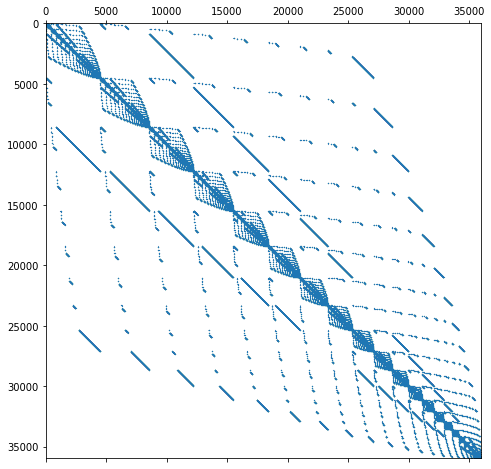

U:  0   m:  4    11.952828645706177
40.72394371032715


In [ ]:
tm=time.time()
l,gs=Hubbard(t,U,n,m)
print(time.time()-tm)

In [ ]:
l

array([-12.03116853])

In [ ]:
np.reshape(local_electron_density(gs,n),(n,n))

array([[0.1101599 , 0.23226635, 0.23226635, 0.1101599 ],
       [0.23226635, 0.42530739, 0.42530739, 0.23226635],
       [0.23226635, 0.42530739, 0.42530739, 0.23226635],
       [0.1101599 , 0.23226635, 0.23226635, 0.1101599 ]])

In [ ]:
np.reshape(magnetic_moment(gs,n),(n,n))

array([[-4.16333634e-17, -4.44089210e-16, -5.41233725e-16,
        -3.19189120e-16],
       [-4.16333634e-17, -3.60822483e-16, -3.05311332e-16,
        -8.32667268e-17],
       [ 6.38378239e-16,  3.05311332e-16,  5.55111512e-17,
         2.91433544e-16],
       [ 4.23272528e-16,  3.19189120e-16,  1.80411242e-16,
         3.33066907e-16]])

In [ ]:
tm=time.time()
po=pairing_order(gs,n,m)
print(time.time()-tm)

301.9879484176636


In [ ]:
norm(po)

0.2553116410277821